In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from data_preprocess import dataFormatter
from skimage import data, exposure
from model import Model
import copy
from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2
import dlib

# Project : O.Frelot A.Guiot

# Abstract
In this project, we will focus on an image classification problem. Our dataset contains a huge number of labelled images representing human faces with different face expression ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'). The idea is to classify these images into these 7 categories. The state of the art of this problem has been done using a deep learning approach in [1] which obtains 75% of accuracy, a Convolutional Neural Network was used during several hours on GPU to obtain these results. Here we want to approach this problem with a much simpler algorithm. Our idea is to try two different approaches : 
- Using HoG features 
- Using faces landmarks features 
- Both  

Moreover to simplify the problem we will reduce the number of categories (we will keep: "Angry", "Happy" and "Sad").
At first, we will start with 3 categories and then move to 7 categories to see the impact on our accuracy. In the end, we succeeded to obtain a score of around XX % (for 3 categories) which is far from the state of the art. But not to bad against the random prediction (0.33).

# Introduction  
As we know, deep learning approach is the state of the art of visual computing problems. For this case, the best score has been obtained using a convolutional neural network in [1].  
Here we would like to try a much simpler approach using HoG features.  
The main idea of our idea is to see if a simple algorithm can provide a good performance. Indeed, a neural netwok can be very long to train (several hours on multi GPU for the face expression problem). Here we will try to classify our images using a simple support verctor machine (SVM) algorithm. The training time for this type of algorithm is very face (around 1 minute).  This might be usefull if we want to train a model on a huge amount ouf data or on a dataset of high quality images

# Problem Definition
### Data set description  
Our data set contains 16040 images of labeled data. Each image is described with 48x48 pixels (2304 pixels).  

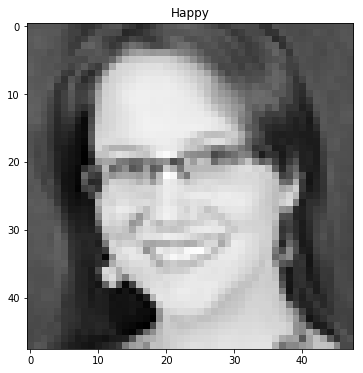

In [43]:
plot_image(7)

The distribution of the categories is as follows : 

In [44]:
emotions_mapping
repartition = csv.emotion.value_counts(True)
repartition.index = repartition.index.map(emotions_mapping)
print(repartition)

Happy       0.251315
Neutral     0.172942
Sad         0.168240
Fear        0.142708
Angry       0.139155
Surprise    0.110453
Disgust     0.015187
Name: emotion, dtype: float64


The data set is unbalenced (all categories doesn't contain the same number of image) 

# Methodology

### HoG features  
Here we will explain how to describe an image using HoG features :  
This could be done in several steps :   
- Calculate the Gradient Images   

At first we compute the gradient $g_x $ and $g_y$  
then :   
$ g= \sqrt{g_x + g_y} $  
$ \theta = arctan(\frac{g_y}{g_x}) $ 

- Calculate Histogram of Gradients in 4×4 cells  

In this step, the image is divided into cells each cells contains 4x4 pixels and a histogram of gradients is calculated for each cell. The histogram contains 9 (as recommended in the original paper) bins corresponding to angles 0, 20, 40 … 160. 

- Normalization  

The next step of the process in to normalise each gradient histogram. Indeed some part of the image might have a bigger brigtness than others. This could lead to a difference in gradient histograms. 

The idea is to normalize each histogram  over a bigger sized block of 8×8. A 8×8 block has 4 histograms which can be concatenated into one vector and can be normalized. Then we can move this 8x8 block by 4 pixel and then recompute the normalization in the block.


### Landmarks features  #TODO
Facial landmarks are used to localize and represent salient regions of the face, such as:  

- Eyes
- Eyebrows
- Nose
- Mouth
- Jawline  

Facial landmarks have been successfully applied to face alignment, head pose estimation, face swapping, blink detection and much more.  

Detecting facial landmarks is a subset of the shape prediction problem. Given an input image, a shape predictor attempts to localize key points of interest along the shape.

In the context of facial landmarks, our goal is detect important facial structures on the face using shape prediction methods.

Detecting facial landmarks is therefore a two step process:

- Step 1 : Localize the face in the image.  
- Step 2: Detect the key facial structures on the face ROI.

### Model (SVM)

# Evalution   
To score our model, we will use the $f_1$ score.  
${\displaystyle f_{1_{i}}=\left({\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}\right)=2\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}}$   
This function compute the score for the $categorie_i$ 
Here we have more than two categories so we will use the mean $f_1$ score to compute our final score : 
$ F_1 = \frac{1}{n} \sum_{i}^{n} f_{1_i}$  

# Conclusions

In [86]:
csv  = pd.read_csv('../challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')
# we filter our data set and only keep images 'happy', 'sad', 'angry'
#csv = csv[(csv.emotion ==0) | (csv.emotion==3) | (csv.emotion==4)]
data = copy.deepcopy(csv)

In [7]:
emotions_mapping = dict({0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'})

In [8]:
def get_image(index):
    img = np.array([int(i) for i in data.pixels.values[index].split()]).reshape((48,48))
    return img

    
def plot_image(index= 10):
    plt.figure(figsize=(8,6))
    img = get_image(index)
    plt.imshow(img, cmap='gray')
    plt.title(emotions_mapping[data.emotion.values[index]])


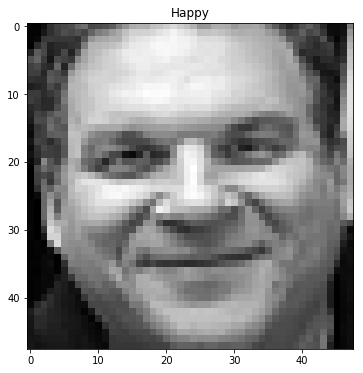

### Preprocess

#### HoG features 

In [103]:
data_train, data_test = train_test_split(csv)

data_formatter_train = dataFormatter(data_train)
data_formatter_test = dataFormatter(data_test)

In [ ]:
hog_image_train = data_formatter_train.compute_hog()
hog_image_test = data_formatter_test.compute_hog()

/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)
/anaconda3/lib/python3.7/site-packages/skimage/feature/_hog.py:248: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


In [ ]:
image_landmarks_train = data_formatter_train.compute_landmarks()
image_landmarks_test = data_formatter_test.compute_landmarks()

In [ ]:
index = 1

hog_image_rescaled = exposure.rescale_intensity(hog_image_train[index], in_range=(0, 10))
img = get_image(index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.set_title(emotions_mapping[csv.emotion.values[index]])
ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)

# Rescale histogram for better display

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

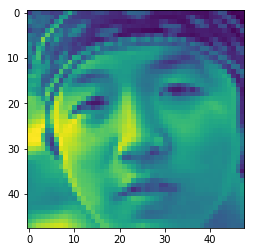

In [98]:
hog_image_rescaled = exposure.rescale_intensity(hog_image_train[index], in_range=(0, 10))
img = get_image(index)
plt.imshow(hog_image_rescaled)
plt.imshow(img)



In [ ]:
data_formatter_train.process_target()
data_formatter_test.process_target()

In [ ]:
hyperparameters = dict({'random_state' : None,
                        'epochs':10000,
                        'kernel':'rbf',
                        'decision_function':'ovr',
                        'gamma':'scale'
                       })
model = Model(model_type ='SVM',hyperparameters= hyperparameters, predictors = 'hog_features', targets=[0,3,4])
model.create_model()
model.train(data_formatter_train.data)

In [ ]:
model.test(data_formatter_test.data)
## score 

In [15]:
len(data)

16040

# References
[1] Christopher Pramerdorfer, Martin Kampel. "Facial Expression Recognition using Convolutional Neural Networks: State of the Art".

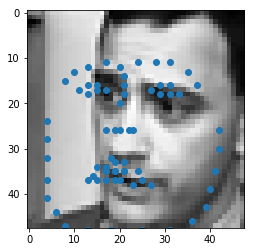

In [84]:
x =data_formatter_test.data.landmarks.values[127] 
#plt.scatter(x[:,0], x[:,1])
plt.scatter(np.array(x[:,0]),np.array(x[:,1]))
plt.imshow(get_image(127), cmap= 'gray')

In [89]:
hog_image_train[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  4.56812   , 37.71859169, ..., 41.91429138,
        27.41331291,  0.        ],
       [ 0.        , 37.71859169,  4.56812   , ..., 27.41331291,
        41.91429138,  0.        ],
       ...,
       [ 0.        ,  2.3420085 ,  4.91549182, ..., 12.97058618,
         3.6875    ,  0.        ],
       [ 0.        ,  4.91549182,  2.3420085 , ...,  3.6875    ,
        12.97058618,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])